In [55]:
# Regular EDA and plotting libraries
import numpy as np # np is short for numpy
import pandas as pd # pandas is so commonly used, it's shortened to pd
import matplotlib.pyplot as plt
import seaborn as sns # seaborn gets shortened to sns

# We want our plots to appear in the notebook
%matplotlib inline 

## Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

## Model evaluators
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay

In [56]:
df = pd.read_csv("Salary_dataset.csv",index_col=0) # 'DataFrame' shortened to 'df'
df.shape # (rows, columns)

(30, 2)

In [57]:
df

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0
5,3.0,56643.0
6,3.1,60151.0
7,3.3,54446.0
8,3.3,64446.0
9,3.8,57190.0


In [58]:
# Let's see how many positive (1) and negative (0) samples we have in our dataframe
df.Salary.value_counts()

Salary
39344.0     1
46206.0     1
122392.0    1
112636.0    1
116970.0    1
105583.0    1
109432.0    1
113813.0    1
101303.0    1
98274.0     1
91739.0     1
93941.0     1
81364.0     1
83089.0     1
66030.0     1
67939.0     1
61112.0     1
57082.0     1
56958.0     1
55795.0     1
63219.0     1
57190.0     1
64446.0     1
54446.0     1
60151.0     1
56643.0     1
39892.0     1
43526.0     1
37732.0     1
121873.0    1
Name: count, dtype: int64

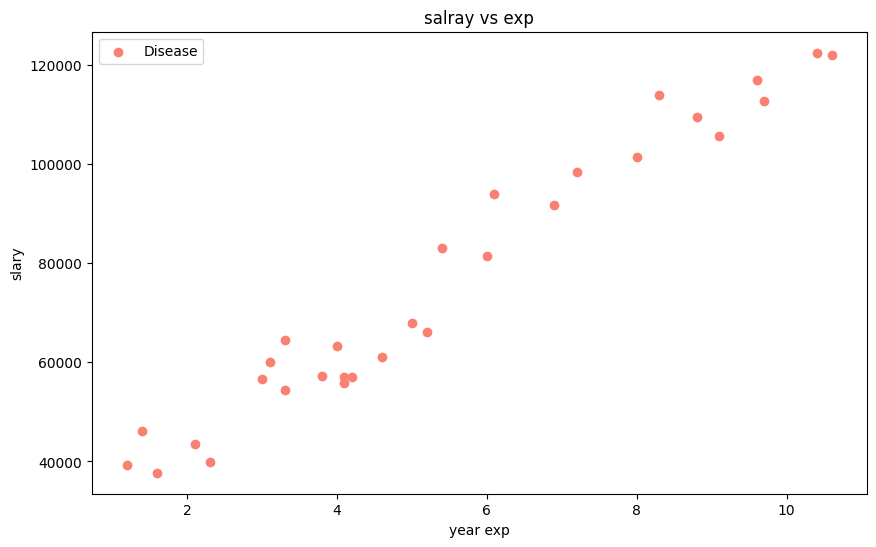

In [59]:
# Create another figure
plt.figure(figsize=(10,6))

# Start with positve examples
plt.scatter(df.YearsExperience, 
            df.Salary, 
            c="salmon") # define it as a scatter figure



# Add some helpful info
plt.title("salray vs exp")
plt.xlabel("year exp")
plt.legend(["Disease", "No Disease"])
plt.ylabel("slary");

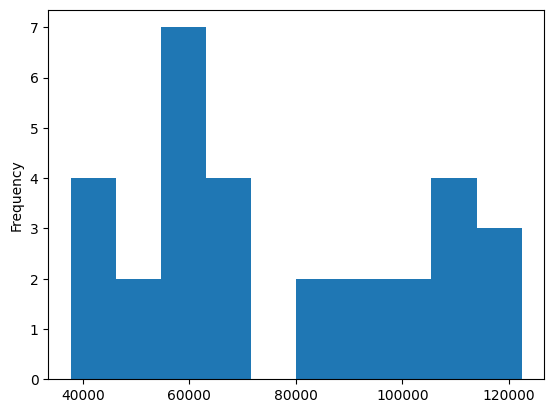

In [60]:
# Histograms are a great way to check the distribution of a variable
df.Salary.plot.hist();

In [61]:
# Find the correlation between our independent variables
corr_matrix = df.corr()
corr_matrix 

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [62]:
# Everything except target variable
X = df.drop("Salary", axis=1)

# Target variable
y = df.Salary

In [63]:
y

0      39344.0
1      46206.0
2      37732.0
3      43526.0
4      39892.0
5      56643.0
6      60151.0
7      54446.0
8      64446.0
9      57190.0
10     63219.0
11     55795.0
12     56958.0
13     57082.0
14     61112.0
15     67939.0
16     66030.0
17     83089.0
18     81364.0
19     93941.0
20     91739.0
21     98274.0
22    101303.0
23    113813.0
24    109432.0
25    105583.0
26    116970.0
27    112636.0
28    122392.0
29    121873.0
Name: Salary, dtype: float64

In [64]:
# Random seed for reproducibility
np.random.seed(42)

# Split into train & test set
X_train, X_test, y_train, y_test = train_test_split(X, # independent variables 
                                                    y, # dependent variable
                                                    test_size = 0.2) # percentage of data to use for test set

In [65]:
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn import datasets, linear_model
# Create the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # StandardScaler as the first step
    ('regressor', linear_model.LinearRegression())  # LinearRegression as the second step
])

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)
####################################################################
#est = linear_model.LinearRegression()
#est.fit(X_train,y_train)
y_preds = pipeline.predict(X_test)

In [66]:
est.score(X_test,y_test)

0.9024461774180498